In [4]:
import pandas as pd 
data=pd.read_excel('Tech Mahindra Reviews.xlsx')

In [5]:
data

,Rating,PositiveReview,NegativeReview
0,5.0,"Very good companies, will provide ample amount...",I currently couldn't see any cons.
1,4.0,They listen to their employees feedback and im...,The systems are not regularly checked before t...
2,3.0,The option to work from home. Impressive compe...,Agent burnout Lack of industry or company know...
3,2.0,You will meet few really supportive and cooper...,TechM has some spoiled senior's in higher mana...
4,4.0,It is great company to work for. I had a good ...,"While everything is great, but the higher auth..."
...,...,...,...
4753,5.0,Good good good good good,No cons no cons no cons
4754,4.0,Different of projects If you are lucky when u ...,Salary is not as per market
4755,4.0,Good work place. Good work env.,Poor work life balance. Less compensation.
4756,4.0,Good work-life balance health benefits. good work,low pay structure low appraisal 3 month notice


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          4758 non-null   float64
 1   PositiveReview  4758 non-null   object 
 2   NegativeReview  4758 non-null   object 
dtypes: float64(1), object(2)
memory usage: 111.6+ KB


In [7]:

def change(x): 
    if x=='5.0'or x=='4.0': 
        return 1 
    else: 
        return 0

data=pd.read_excel('Tech Mahindra Reviews.xlsx',converters={'Rating':change})

In [8]:
data.Rating.unique()

array([1, 0], dtype=int64)

In [9]:
a=data.groupby('Rating')
b=a.get_group(0).count()
c=a.get_group(1).count()
print(f'negative ratings: {b}, positive ratings : {c}')

negative ratings: Rating            1871
PositiveReview    1871
NegativeReview    1871
dtype: int64, positive ratings : Rating            2887
PositiveReview    2887
NegativeReview    2887
dtype: int64


In [10]:
#to make imbalanced data balanced
a=data.groupby('Rating')
b=a.get_group(0)
c=a.get_group(1)[:2000]
data=pd.concat([b,c],ignore_index=True)

In [11]:
data

,Rating,PositiveReview,NegativeReview
0,0,The option to work from home. Impressive compe...,Agent burnout Lack of industry or company know...
1,0,You will meet few really supportive and cooper...,TechM has some spoiled senior's in higher mana...
2,0,"Good technical expertise, Good Work environment","Less pay, No pay for overtime, Less work-life ..."
3,0,Best place to work. Some how helpful team memb...,No work life balance. In peak time you need to...
4,0,Nothing as such. Management is busy taking awa...,1. Zero Learning. 2. Egoistic Senior Managemen...
...,...,...,...
3866,1,Good company with friendly envinorment,"hikes will be less, no good appreciation."
3867,1,Excellent infrastructure.. Worth working for s...,No any negatives Happy to work with Tech Mahindra
3868,1,Worked mostly with client so dont know much ab...,Internal portal is very boring and slow
3869,1,Good Environment to work in.,No hike or promotion in the company


In [14]:
a=data.groupby('Rating')
a.get_group(0).count()

Rating            1871
PositiveReview    1871
NegativeReview    1871
dtype: int64

In [15]:
a=data.groupby('Rating')
a.get_group(1).count()

Rating            2000
PositiveReview    2000
NegativeReview    2000
dtype: int64

In [16]:
data

,Rating,PositiveReview,NegativeReview
0,0,The option to work from home. Impressive compe...,Agent burnout Lack of industry or company know...
1,0,You will meet few really supportive and cooper...,TechM has some spoiled senior's in higher mana...
2,0,"Good technical expertise, Good Work environment","Less pay, No pay for overtime, Less work-life ..."
3,0,Best place to work. Some how helpful team memb...,No work life balance. In peak time you need to...
4,0,Nothing as such. Management is busy taking awa...,1. Zero Learning. 2. Egoistic Senior Managemen...
...,...,...,...
3866,1,Good company with friendly envinorment,"hikes will be less, no good appreciation."
3867,1,Excellent infrastructure.. Worth working for s...,No any negatives Happy to work with Tech Mahindra
3868,1,Worked mostly with client so dont know much ab...,Internal portal is very boring and slow
3869,1,Good Environment to work in.,No hike or promotion in the company


In [ ]:
data['Reviews']=data.apply(lambda x: x.PositiveReview if x.Rating==1 else x.NegativeReview,axis=1)

In [ ]:
data.drop(['PositiveReview','NegativeReview'],axis=1,inplace=True)

In [22]:
data

,Rating,Reviews
0,0,Agent burnout Lack of industry or company know...
1,0,TechM has some spoiled senior's in higher mana...
2,0,"Less pay, No pay for overtime, Less work-life ..."
3,0,No work life balance. In peak time you need to...
4,0,1. Zero Learning. 2. Egoistic Senior Managemen...
...,...,...
3866,1,Good company with friendly envinorment
3867,1,Excellent infrastructure.. Worth working for s...
3868,1,Worked mostly with client so dont know much ab...
3869,1,Good Environment to work in.


In [23]:
data['Reviews']=[i.lower() for i in data.Reviews ]

In [24]:
import re
data['Reviews']=data.Reviews.apply(lambda x:re.sub('[^a-zA-Z]',' ',x))

In [25]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [26]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
data['Reviews']=data['Reviews'].apply(lambda x:[i for i in tk.tokenize(x) if i not in stopwords]).apply(lambda x:' '.join(x))

In [28]:
data['Reviews']=data['Reviews'].apply(lambda x:' '.join([i for i in tk.tokenize(x) if len(i)>4]))

In [29]:
data

,Rating,Reviews
0,0,agent burnout industry company knowledge langu...
1,0,techm spoiled senior higher management lower l...
2,0,overtime balance
3,0,balance
4,0,learning egoistic senior management willing li...
...,...,...
3866,1,company friendly envinorment
3867,1,excellent infrastructure worth working salary
3868,1,worked mostly client techm
3869,1,environment


In [30]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tagged=[nltk.pos_tag(tk.tokenize(i)) for i in data['Reviews'] ]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aparna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
from nltk.corpus import wordnet
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    if nltk_tag.startswith('V'):
        return wordnet.VERB
    if nltk_tag.startswith('N'):
        return wordnet.NOUN
    if nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [32]:
pos_tagged

[[('agent', 'NN'),
  ('burnout', 'IN'),
  ('industry', 'NN'),
  ('company', 'NN'),
  ('knowledge', 'NN'),
  ('language', 'NN'),
  ('barriers', 'NNS'),
  ('falls', 'VBP'),
  ('among', 'IN'),
  ('workplace', 'NN'),
  ('injuries', 'NNS'),
  ('falls', 'VBZ'),
  ('common', 'JJ'),
  ('severe', 'JJ'),
  ('mental', 'JJ'),
  ('health', 'NN')],
 [('techm', 'NN'),
  ('spoiled', 'VBD'),
  ('senior', 'JJ'),
  ('higher', 'RBR'),
  ('management', 'NN'),
  ('lower', 'JJR'),
  ('level', 'NN'),
  ('dirty', 'JJ'),
  ('unethical', 'JJ'),
  ('organisation', 'NN'),
  ('order', 'NN'),
  ('sales', 'NNS'),
  ('sales', 'NNS'),
  ('different', 'JJ'),
  ('benefits', 'NNS'),
  ('anyway', 'RB'),
  ('gonna', 'VBP'),
  ('incentives', 'NNS'),
  ('organization', 'NN'),
  ('never', 'RB'),
  ('people', 'NNS'),
  ('think', 'VBP'),
  ('earning', 'VBG'),
  ('deductions', 'NNS'),
  ('exploitation', 'NN'),
  ('balance', 'NN'),
  ('exists', 'VBZ'),
  ('polite', 'RB'),
  ('focused', 'JJ'),
  ('force', 'NN'),
  ('unethical', 'JJ

In [33]:
whole=[]

for i in pos_tagged:
    s=[]
    for j in i:
         b=[j[0],pos_tagger(j[1])]
         s.append(b)
    whole.append(s)  

In [34]:
whole

[[['agent', 'n'],
  ['burnout', None],
  ['industry', 'n'],
  ['company', 'n'],
  ['knowledge', 'n'],
  ['language', 'n'],
  ['barriers', 'n'],
  ['falls', 'v'],
  ['among', None],
  ['workplace', 'n'],
  ['injuries', 'n'],
  ['falls', 'v'],
  ['common', 'a'],
  ['severe', 'a'],
  ['mental', 'a'],
  ['health', 'n']],
 [['techm', 'n'],
  ['spoiled', 'v'],
  ['senior', 'a'],
  ['higher', 'r'],
  ['management', 'n'],
  ['lower', 'a'],
  ['level', 'n'],
  ['dirty', 'a'],
  ['unethical', 'a'],
  ['organisation', 'n'],
  ['order', 'n'],
  ['sales', 'n'],
  ['sales', 'n'],
  ['different', 'a'],
  ['benefits', 'n'],
  ['anyway', 'r'],
  ['gonna', 'v'],
  ['incentives', 'n'],
  ['organization', 'n'],
  ['never', 'r'],
  ['people', 'n'],
  ['think', 'v'],
  ['earning', 'v'],
  ['deductions', 'n'],
  ['exploitation', 'n'],
  ['balance', 'n'],
  ['exists', 'v'],
  ['polite', 'r'],
  ['focused', 'a'],
  ['force', 'n'],
  ['unethical', 'a'],
  ['practices', 'n'],
  ['sales', 'n'],
  ['threaten', 'v'

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
whole_lema=[]
corpus=[]

for i in whole:
    s=[]
    for j in i:
         if j[1]==None:
            s.append(j[0])
         else:
            s.append(lemmatizer.lemmatize(j[0],j[1]))
    corpus.append(s)   
    whole_lema.append(' '.join(s))

In [36]:
whole_lema

['agent burnout industry company knowledge language barrier fall among workplace injury fall common severe mental health',
 'techm spoil senior higher management low level dirty unethical organisation order sale sale different benefit anyway gonna incentive organization never people think earn deduction exploitation balance exist polite focused force unethical practice sale threaten possible bad outcome avoid techm bad transportation facility driver disrespectful employee specially male thing cannot write otherwise',
 'overtime balance',
 'balance',
 'learn egoistic senior management willing listen problem opportunities recognition promotion promise',
 'balance',
 'everything mainly salary year increment though high rating time annual appraisal careless management',
 'service base organization revenue generator increment depend project allocation',
 'mostly support project',
 'salary compare peer',
 'salary always year',
 'difficult project',
 'salary hike proper management track exper

In [37]:
for i in range(len(data.Reviews)):
    
      data.Reviews.replace( data.Reviews[i],whole_lema[i],inplace=True)

In [38]:
data

,Rating,Reviews
0,0,agent burnout industry company knowledge langu...
1,0,techm spoil senior higher management low level...
2,0,overtime balance
3,0,balance
4,0,learn egoistic senior management willing liste...
...,...,...
3866,1,company friendly envinorment
3867,1,excellent infrastructure worth work salary
3868,1,work mostly client techm
3869,1,environment


In [39]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(data['Reviews'])
x=tf_idf_vector#x can be array or dataframe ie double brackets needed to get column array has that .
y=data['Rating']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay,f1_score

In [42]:
models={'logistic':{'model':LogisticRegression()},'random_forest':{'model':RandomForestClassifier()},'decision_tree':{'model':DecisionTreeClassifier()},'Multinomial':{'model':MultinomialNB()},'KNN':{'model':KNeighborsClassifier()},'XGBClassifier':{'model':XGBClassifier()},'svm':{'model':SVC()}}
list=[]
for k,v in models.items():
 score=cross_val_score(v['model'],x,y,cv=5)
 s=score.mean()
 l={'model':v['model'],'score':s}
 list.append(l)
list
data_frame=pd.DataFrame(list)
data_frame

,model,score
0,LogisticRegression(),0.833636
1,RandomForestClassifier(),0.823041
2,DecisionTreeClassifier(),0.780166
3,MultinomialNB(),0.833119
4,KNeighborsClassifier(),0.697238
5,"XGBClassifier(base_score=None, booster=None, c...",0.819167
6,SVC(),0.832085


In [58]:
import numpy as np
models_tuned={'Multinomial':{'model':MultinomialNB(),'params':{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],'fit_prior': [True, False],'class_prior': [None]}},'logistic':{'model':LogisticRegression(),'params':{'penalty' : ['l2'],'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [100, 1000,2500, 5000]}},'svm':{'model':SVC(),'params':{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel':['poly','linear','sigmoid','rbf']}},'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[int(x) for x in np.linspace(1,100,100)]}},'XGBClassifier':{'model':XGBClassifier(),'params':{'n_estimators':[int(x) for x in np.linspace(1,100,100)]}}}

In [59]:
list2=[]
for k,v in models_tuned.items():
    k=v['model']
    clf=GridSearchCV(k,param_grid=v['params'],cv=5)
    clf.fit(x,y)
    print(k,':',clf.best_score_)
    l={'model':v['model'],'best_params':clf.best_params_,' best_score':clf.best_score_}
    list2.append(l)
score_dataframe=pd.DataFrame(list2)
score_dataframe

MultinomialNB() : 0.834667000083354
LogisticRegression() : 0.8341532049679087
SVC() : 0.8326018171209469
RandomForestClassifier() : 0.8256264066016504
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 0.8212353088272067


,model,best_params,best_score
0,MultinomialNB(),"{'alpha': 1.0, 'class_prior': None, 'fit_prior...",0.834667
1,LogisticRegression(),"{'max_iter': 1000, 'penalty': 'l2', 'solver': ...",0.834153
2,SVC(),"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.832602
3,RandomForestClassifier(),{'n_estimators': 76},0.825626
4,"XGBClassifier(base_score=None, booster=None, c...",{'n_estimators': 80},0.821235


In [ ]:
score_dataframe['best_params'][0]

In [ ]:
from matplotlib import pyplot as plt
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)
multinomial=MultinomialNB(alpha=1.0, class_prior= None, fit_prior= False)
multinomial.fit(x_train,y_train)
new=multinomial.predict(x_test)
cm=confusion_matrix(y_test,new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()
print(classification_report(y_test,new))

In [374]:
m='bad place to work'#'no work life balance'#'no increment more work'
m=m.split()
m=' '.join([i.lower() for i in m if i not in stopwords])
l=[]
l.append(m)
_vector = tr_idf_model.transform(l).toarray()# model training time only fit need
logistic.predict(_vector)

# _vector.toarray()

array([1], dtype=int64)

### topic modelling

In [60]:
reviews=data.groupby('Rating')
negative_reviews=reviews.get_group(0).Reviews
type(negative_reviews)

pandas.core.series.Series

In [61]:
negative_reviews_tokenized=[tk.tokenize(i) for i in negative_reviews]
negative_reviews_tokenized

[['agent',
  'burnout',
  'industry',
  'company',
  'knowledge',
  'language',
  'barrier',
  'fall',
  'among',
  'workplace',
  'injury',
  'fall',
  'common',
  'severe',
  'mental',
  'health'],
 ['techm',
  'spoil',
  'senior',
  'higher',
  'management',
  'low',
  'level',
  'dirty',
  'unethical',
  'organisation',
  'order',
  'sale',
  'sale',
  'different',
  'benefit',
  'anyway',
  'gonna',
  'incentive',
  'organization',
  'never',
  'people',
  'think',
  'earn',
  'deduction',
  'exploitation',
  'balance',
  'exist',
  'polite',
  'focused',
  'force',
  'unethical',
  'practice',
  'sale',
  'threaten',
  'possible',
  'bad',
  'outcome',
  'avoid',
  'techm',
  'bad',
  'transportation',
  'facility',
  'driver',
  'disrespectful',
  'employee',
  'specially',
  'male',
  'thing',
  'cannot',
  'write',
  'otherwise'],
 ['overtime', 'balance'],
 ['balance'],
 ['learn',
  'egoistic',
  'senior',
  'management',
  'willing',
  'listen',
  'problem',
  'opportunities'

In [62]:
from gensim import corpora

In [63]:
dictionary=corpora.Dictionary(negative_reviews_tokenized)

In [64]:
doc_term_matrix=[dictionary.doc2bow(rev) for rev in negative_reviews_tokenized]

In [65]:
import gensim

In [66]:

ldamodel=gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics =3,random_state=100,chunksize=100 ,iterations=100, id2word=dictionary, passes=10)
# ldamodel.save('model5.gensim')
ldamodel.print_topics()#we can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

[(0,
  '0.066*"salary" + 0.039*"company" + 0.028*"management" + 0.024*"employee" + 0.022*"growth" + 0.021*"politics" + 0.020*"culture" + 0.017*"bad" + 0.016*"shift" + 0.016*"benefit"'),
 (1,
  '0.059*"project" + 0.047*"management" + 0.041*"hike" + 0.039*"salary" + 0.034*"appraisal" + 0.030*"balance" + 0.028*"increment" + 0.016*"opportunity" + 0.015*"growth" + 0.014*"process"'),
 (2,
  '0.038*"employee" + 0.028*"nothing" + 0.025*"pressure" + 0.025*"policy" + 0.025*"manager" + 0.017*"give" + 0.017*"client" + 0.010*"without" + 0.010*"friendly" + 0.009*"people"')]

In [67]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

In [68]:
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

C:\Users\Aparna\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.165274  0.162357       1        1  34.763366
0     -0.072580 -0.210836       2        1  34.462396
2      0.237854  0.048479       3        1  30.774238, topic_info=              Term        Freq       Total Category  logprob  loglift
87         project  215.000000  215.000000  Default  30.0000  30.0000
97            hike  152.000000  152.000000  Default  29.0000  29.0000
79          salary  380.000000  380.000000  Default  28.0000  28.0000
5          company  143.000000  143.000000  Default  27.0000  27.0000
72       appraisal  125.000000  125.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
27        employee  121.868253  208.949067   Topic3  -3.2788   0.6393
246          issue   19.939380   28.261984   Topic3  -5.0891   0.8297
933  communication   16.917440   21.607775   Topic3  -5.2534   0.9338
46          people   28.379576   71.967516   Topic3  -4.7361   0.2479
248           work   14.762423   68.856387   Topic3  -5.3897  -0.3614

[147 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
225       1  0.979737     across
571       2  0.949166  allowance
94        3  0.976051     always
71        1  0.988115     annual
72        1  0.993439  appraisal
...     ...       ...        ...
248       2  0.711626       work
248       3  0.217845       work
82        1  0.410892       year
82        2  0.600534       year
140       2  0.971955     yearly

[129 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


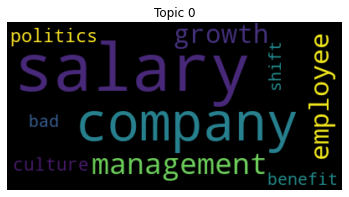

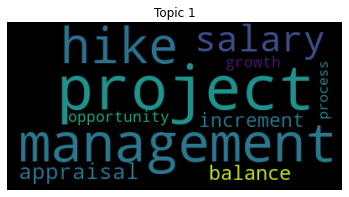

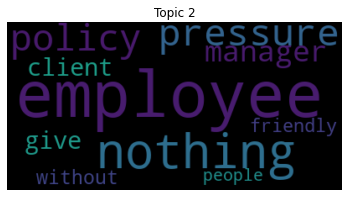

In [71]:
from matplotlib import pyplot as plt
from PIL import Image
from wordcloud import WordCloud
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="black", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
for i in range(0,3):
    create_wordcloud(ldamodel, topic=i)

In [72]:
perplexity = ldamodel.log_perplexity(doc_term_matrix,total_docs=10000) 
print('\nPerplexity: ',perplexity )# a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=negative_reviews_tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)#higher the coherence, model is better


Perplexity:  -6.626835581764752

Coherence Score:  0.28364144022840726


In [73]:
from gensim.models import CoherenceModel

In [74]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [75]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=negative_reviews_tokenized, start=2, limit=40, step=1)

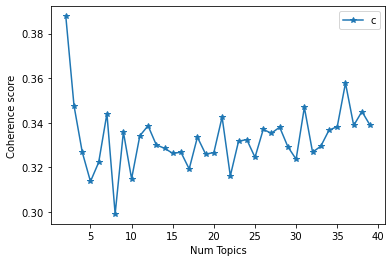

In [76]:
# Show graph
from matplotlib import pyplot as plt
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values,marker='*')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# for i,j in zip(x,coherence_values):
#     print(f'num_topic{i} has coherence value {j}')

In [77]:
optimal_model=model_list[36]
optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=5)

[(22,
  '0.066*"salary" + 0.048*"employee" + 0.039*"company" + 0.028*"appraisal" + 0.024*"growth"'),
 (23,
  '0.059*"project" + 0.039*"salary" + 0.032*"balance" + 0.026*"management" + 0.021*"growth"'),
 (37,
  '0.051*"project" + 0.040*"management" + 0.023*"salary" + 0.021*"work" + 0.015*"benefit"'),
 (34,
  '0.034*"month" + 0.031*"appraisal" + 0.022*"join" + 0.019*"salary" + 0.016*"bad"'),
 (35,
  '0.023*"company" + 0.023*"would" + 0.021*"culture" + 0.017*"provide" + 0.017*"give"'),
 (32,
  '0.039*"appraisal" + 0.035*"management" + 0.027*"process" + 0.027*"salary" + 0.024*"project"'),
 (24,
  '0.027*"project" + 0.024*"increment" + 0.024*"management" + 0.018*"month" + 0.016*"client"'),
 (18,
  '0.107*"salary" + 0.041*"growth" + 0.026*"increment" + 0.019*"hike" + 0.015*"manager"'),
 (6,
  '0.039*"project" + 0.034*"management" + 0.032*"salary" + 0.017*"employee" + 0.012*"internal"'),
 (21,
  '0.039*"project" + 0.038*"shift" + 0.024*"fix" + 0.022*"company" + 0.014*"politics"'),
 (16,
  '0.

In [78]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

C:\Users\Aparna\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22     0.008832  0.074174       1        1  7.707598
12    -0.035520  0.080469       2        1  6.141647
2     -0.017133  0.091891       3        1  4.672372
23    -0.008877  0.017802       4        1  3.624418
7     -0.070894  0.050354       5        1  3.588445
15    -0.045683  0.040734       6        1  3.468900
10     0.030519  0.084222       7        1  3.300413
24    -0.099696  0.054336       8        1  3.247850
18     0.029497 -0.002495       9        1  3.026834
26    -0.033104  0.036913      10        1  2.964809
5      0.001378  0.059808      11        1  2.952684
14     0.017672 -0.001369      12        1  2.914447
30    -0.003836  0.039473      13        1  2.853749
19     0.105875  0.053900      14        1  2.711008
29     0.019915  0.047489      15        1  2.554312
35    -0.053118 -0.024416      16        1  2.514450
16     0.004801  0.033425      17        1  2.453151
1      0.135223  0.011370      18        1  2.246896
31    -0.001473  0.013203      19        1  2.217656
32     0.006699 -0.053555      20        1  2.143792
11    -0.066164  0.036140      21        1  2.123598
21    -0.083384 -0.039761      22        1  2.112957
25    -0.063648 -0.043663      23        1  2.093911
6     -0.056545  0.005646      24        1  2.079673
8      0.095269 -0.001176      25        1  2.053821
28    -0.033582 -0.058183      26        1  2.018728
20    -0.018549 -0.070009      27        1  1.942046
37    -0.072581 -0.007180      28        1  1.857522
17     0.070762 -0.034071      29        1  1.843076
33     0.032377 -0.018214      30        1  1.807413
36     0.044942 -0.035053      31        1  1.802388
27     0.091940 -0.022977      32        1  1.797664
13     0.044951 -0.016610      33        1  1.771648
4     -0.046009 -0.072102      34        1  1.636812
3     -0.000713 -0.044049      35        1  1.610404
34    -0.073280 -0.120357      36        1  1.568709
9      0.096389  0.006426      37        1  1.360866
0      0.046749 -0.172535      38        1  1.213331, topic_info=             Term        Freq       Total Category  logprob  loglift
87        project  219.000000  219.000000  Default  30.0000  30.0000
154        growth  145.000000  145.000000  Default  29.0000  29.0000
79         salary  364.000000  364.000000  Default  28.0000  28.0000
72      appraisal  113.000000  113.000000  Default  27.0000  27.0000
39     management  241.000000  241.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
159  compensation    0.955863   39.650742  Topic38  -4.8936   0.6866
252       manager    0.955851   99.215322  Topic38  -4.8936  -0.2306
303       release    0.955848   12.085467  Topic38  -4.8936   1.8746
101        follow    0.955843   18.144839  Topic38  -4.8936   1.4683
95      difficult    0.955833   14.278491  Topic38  -4.8936   1.7079

[2354 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1892     21  0.555387       abide
1676     36  0.555727     abscond
1638      7  0.578904      absent
1414     14  0.568020   accenture
700      36  0.555731  accomplish
...     ...       ...         ...
140      19  0.048327      yearly
140      23  0.144980      yearly
140      30  0.048327      yearly
140      31  0.048327      yearly
140      37  0.048327      yearly

[4762 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 13, 3, 24, 8, 16, 11, 25, 19, 27, 6, 15, 31, 20, 30, 36, 17, 2, 32, 33, 12, 22, 26, 7, 9, 29, 21, 38, 18, 34, 37, 28, 14, 5, 4, 35, 10, 1])

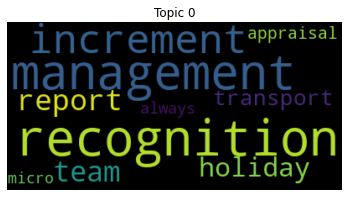

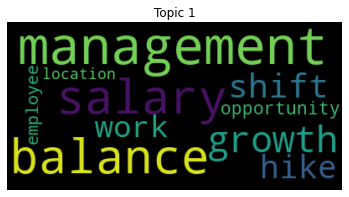

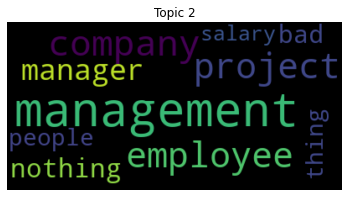

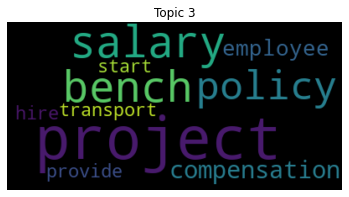

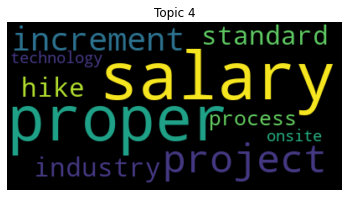

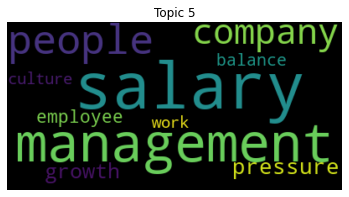

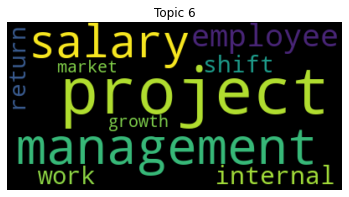

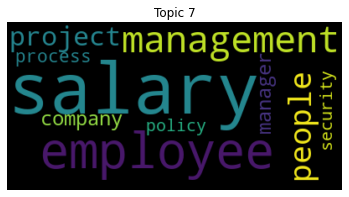

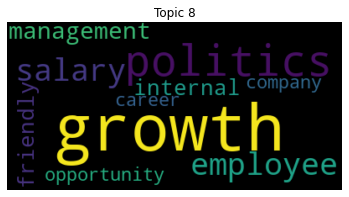

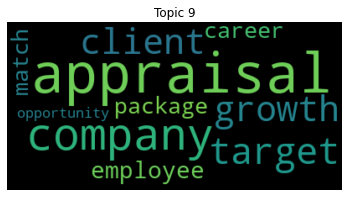

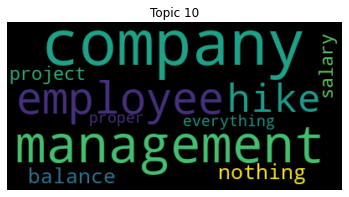

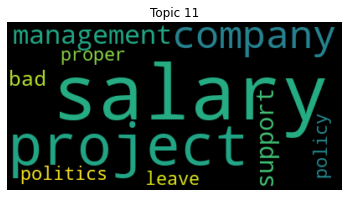

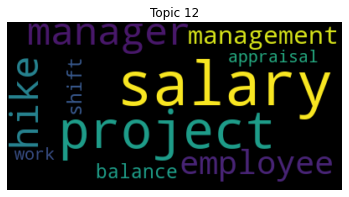

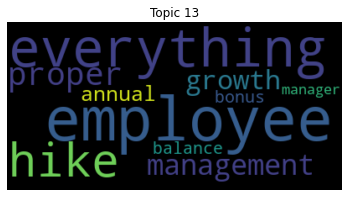

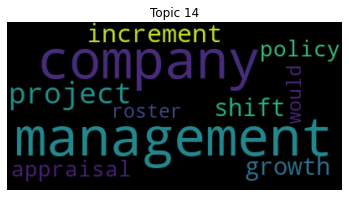

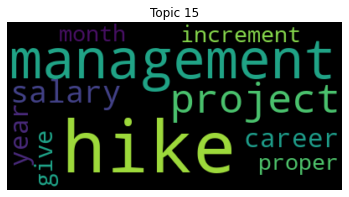

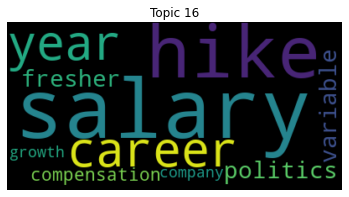

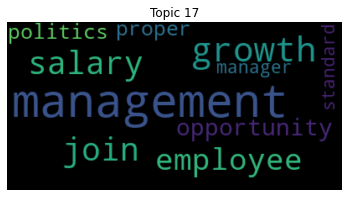

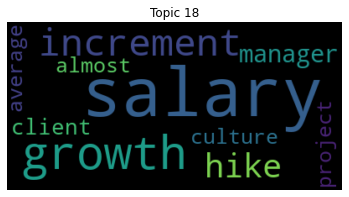

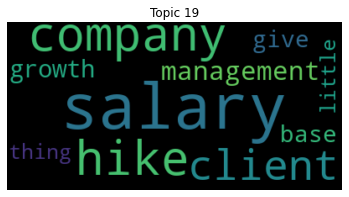

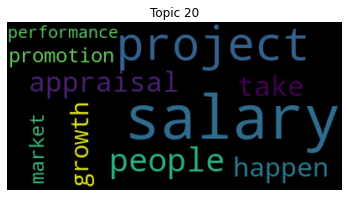

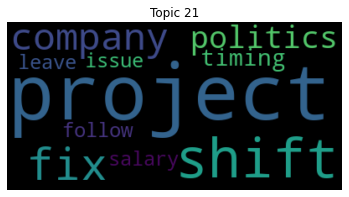

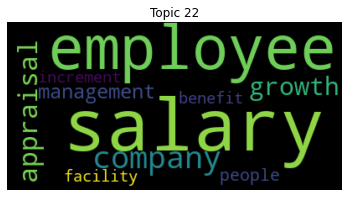

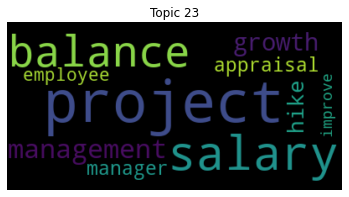

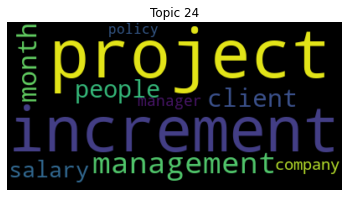

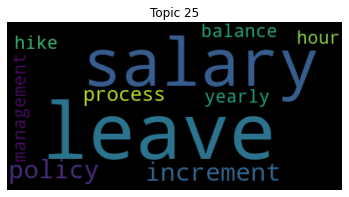

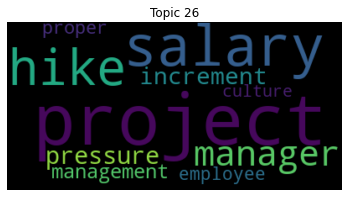

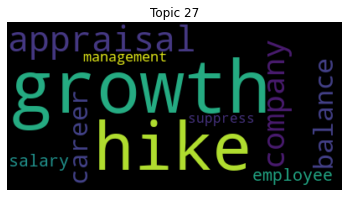

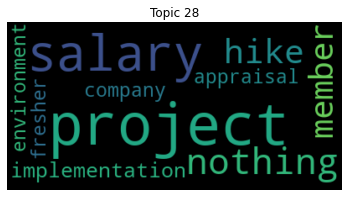

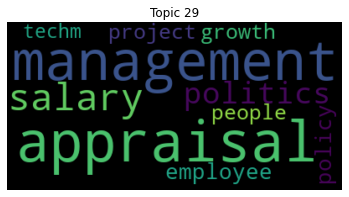

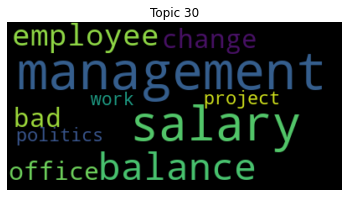

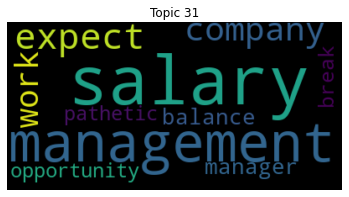

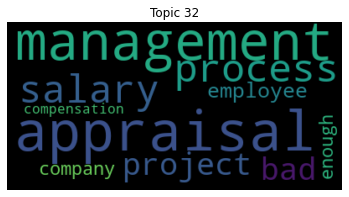

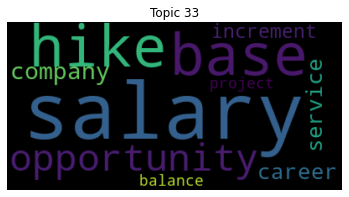

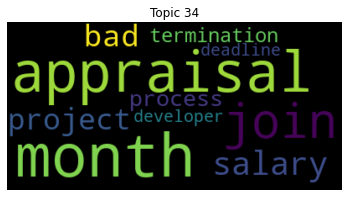

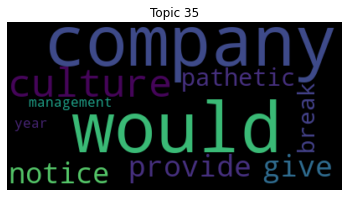

In [79]:
from PIL import Image
from wordcloud import WordCloud
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="black", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
for i in range(0,36):
    create_wordcloud(optimal_model, topic=i)

### GSDMM

In [80]:
conda install git

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [81]:
# The GSDMM implementation package
!pip install git+https://github.com/rwalk/gsdmm.git

  Cloning https://github.com/rwalk/gsdmm.git to c:\users\aparna\appdata\local\temp\pip-req-build-ynglckc6
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee


  Running command git clone -q https://github.com/rwalk/gsdmm.git 'C:\Users\Aparna\AppData\Local\Temp\pip-req-build-ynglckc6'


In [82]:
from gsdmm import MovieGroupProcess
from tqdm import tqdm

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = doc_term_matrix
vocab_length = len(dictionary)

# initialize GSDMM
gsdmm = MovieGroupProcess(K=4, alpha=0.1, beta=0.3, n_iters=30)
# fit GSDMM model
y = gsdmm.fit(negative_reviews_tokenized, vocab_length)

In stage 0: transferred 1337 clusters with 4 clusters populated
In stage 1: transferred 1015 clusters with 4 clusters populated
In stage 2: transferred 836 clusters with 4 clusters populated
In stage 3: transferred 772 clusters with 4 clusters populated
In stage 4: transferred 694 clusters with 4 clusters populated
In stage 5: transferred 640 clusters with 4 clusters populated
In stage 6: transferred 612 clusters with 4 clusters populated
In stage 7: transferred 633 clusters with 4 clusters populated
In stage 8: transferred 565 clusters with 4 clusters populated
In stage 9: transferred 562 clusters with 4 clusters populated
In stage 10: transferred 510 clusters with 4 clusters populated
In stage 11: transferred 554 clusters with 4 clusters populated
In stage 12: transferred 549 clusters with 4 clusters populated
In stage 13: transferred 552 clusters with 4 clusters populated
In stage 14: transferred 538 clusters with 4 clusters populated
In stage 15: transferred 520 clusters with 4 clu

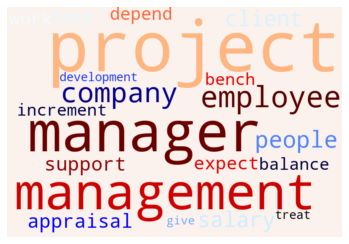

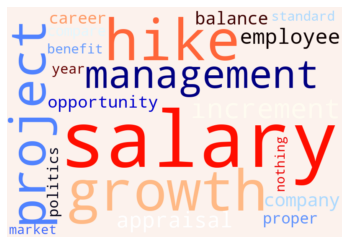

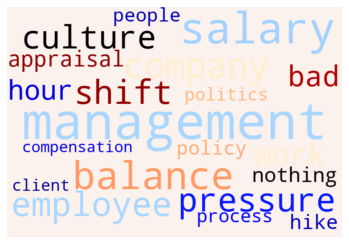

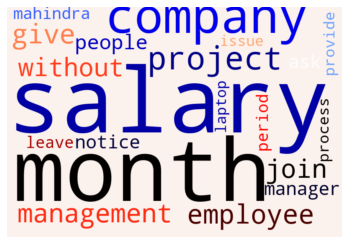

In [83]:
# Import wordcloud library
from wordcloud import WordCloud
# Get topic word distributions from gsdmm model
word_dist = gsdmm.cluster_word_distribution
# Select topic you want to output as dictionary
for i in range(4):
 topic_dict = sorted(word_dist[i].items(), key=lambda k: k[1], reverse=True)[:20]
# Generate a word cloud image
 wordcloud = WordCloud(background_color='#fcf2ed', width=800, height=550,colormap='flag').generate_from_frequencies(dict(topic_dict))
 import matplotlib
 import matplotlib.pyplot as plt
 fig, ax = plt.subplots(figsize=[6,10])
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.axis("off")